In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import plotly.express as px
from utils import *

In [2]:
# Load CSVs
standard_csv = Path("ising_model_sweep_data.csv")
qdrift_csv = Path("qdrift_ising_model_sweep_data2.csv")
qdrift_csv_more_random = Path("qdrift_ising_model_sweep_data_more_random.csv")

standard_qpe_df = pd.read_csv(standard_csv)
qdrift_qpe_df = pd.read_csv(qdrift_csv)
qdrift_qpe_df_more_random = pd.read_csv(qdrift_csv_more_random)

In [3]:

def error_upper_bound_worst_case(n, t: float, lam, N):

    return np.sqrt(n * t ** 2 * lam ** 2 / N)

def error_upper_bound_average_case(n, t: float, lam, N):
    return np.ceil((2 * lam ** 2 * t ** 2) / N)


def plot_error_vs_time(df: pd.DataFrame, title_suffix, true_eigenval):

    fig_scatter = px.scatter(
        df,
        x="Time",
        y="Eigenvalue Error",
        color="Num Ancilla",
        title=f"Eigenvalue Error vs Time (Scatter Plot) {title_suffix}",
        labels={"Eigenvalue Error": "Error", "Num Qubits": "# Qubits"},
    )
    # Add a horizontal line for the true eigenvalue

    fig_scatter.add_hline(y=true_eigenval, line_dash="dash", line_color="red", annotation_text="Magnitude of True Eigenvalue", annotation_position="top left")
    fig_scatter.update_layout(
        xaxis_title="Simulation Time",
        yaxis_title="Eigenvalue Estimation Error",
        legend_title="Number of Ancilla Qubits",
    )
    fig_scatter.show()

def loglog_error_vs_time(df: pd.DataFrame, title_suffix, true_eigenval):
    fig_loglog = px.scatter(
        df,
        x="Time",
        y="Eigenvalue Error",
        color="Num Ancilla",
        log_x=True,
        log_y=True,
        title=f"Eigenvalue Error vs Time (Log-Log Plot) {title_suffix}",
        labels={"Eigenvalue Error": "Error", "Num Qubits": "# Qubits"},
    )
    # Add a horizontal line for the true eigenvalue
    fig_loglog.add_hline(y=true_eigenval, line_dash="dash", line_color="red", annotation_text="Magnitude of True Eigenvalue", annotation_position="top left")
    fig_loglog.update_layout(
        xaxis_title="Simulation Time (Log Scale)",
        yaxis_title="Eigenvalue Estimation Error (Log Scale)",
        legend_title="Number of Ancilla Qubits",
    )

    fig_loglog.show()

def plot_error_vs_ancilla(df: pd.DataFrame, title_suffix=""):
    fig = px.box(
        df,
        x="Num Ancilla",
        y="Eigenvalue Error",
        points="all",
        title=f"Error vs Number of Ancilla Qubits {title_suffix}",
        labels={"Num Ancilla": "# Ancilla Qubits", "Eigenvalue Error": "Eigenvalue Estimation Error"},
    )
    fig.show()

def plot_3d_relationship(df: pd.DataFrame, title_suffix=""):
    fig = px.scatter_3d(
        df,
        x="Time",
        y="Num Ancilla",
        z="Eigenvalue Error",
        color="Eigenvalue Error",
        title=f"3D Plot of Error vs Time vs Ancilla Qubits {title_suffix}",
        labels={"Time": "Simulation Time", "Num Ancilla": "# Ancilla Qubits", "Eigenvalue Error": "Error"},
    )
    fig.show()


In [4]:
# lets start with standard qpe
exact_eigenvalue = 2.4
plot_error_vs_time(standard_qpe_df, "Standard QPE", exact_eigenvalue)

In [5]:
# now qdrift qpe
exponential_invocations = qdrift_qpe_df[qdrift_qpe_df["QDRIFT Implementation"] == "exponential invocations of qdrift channel"]
plot_error_vs_time(exponential_invocations, "qDRIFT-QPE: exponential invocations of qDRIFT channel", exact_eigenvalue)

In [6]:
linear_invocations = qdrift_qpe_df[qdrift_qpe_df["QDRIFT Implementation"] == "linear invocations of qdrift channel"]
plot_error_vs_time(linear_invocations, "qDRIFT-QPE: linear invocations of qDRIFT channel", exact_eigenvalue)

In [7]:
loglog_error_vs_time(exponential_invocations, "qDRIFT-QPE: exponential invocations of qdrift channel", exact_eigenvalue)

In [8]:
exact_eigenvalue = 2.4
exponential_invocations_more_random = qdrift_qpe_df_more_random[qdrift_qpe_df_more_random["QDRIFT Implementation"] == "exponential invocations of qdrift channel"]
plot_error_vs_time(exponential_invocations_more_random, "qDRIFT-QPE: exponential invocations of qdrift channel (more random)", exact_eigenvalue)

In [9]:
linear_invocations_more_random = qdrift_qpe_df_more_random[qdrift_qpe_df_more_random["QDRIFT Implementation"] == "linear invocations of qdrift channel"]
plot_error_vs_time(linear_invocations_more_random, "qDRIFT-QPE: linear invocations of qdrift channel (more random)", exact_eigenvalue)
loglog_error_vs_time(exponential_invocations_more_random, "qDRIFT-QPE: exponential invocations of qdrift channel (more random)", exact_eigenvalue)

# New experiments:
let $s$ be the number of times a given quantum circuit is executed. Let 
- instead of generating one random QPE circuit, and measuring it $s$ times, 
  we generate $s$ random QPE circuits, and measure each of them once. Test $s=1024$.
  - Also perfrorm every other test with the usual $s=1$.
- Test simpler Hamiltoninan $Z \otimes Z$
- change the distance between times from linear to logarithmic
- test two different time ranges: $[0, 1]$ and $[0, 0.1]$


In [10]:
qdrift_qpe_df_other_parameters = pd.read_csv("qdrift_ising_model_sweep_data_all_2025-06-05.csv")
expected_eigenvalue = 3.1240998703626572
for group in qdrift_qpe_df_other_parameters.groupby("Num Random Circuits"):
    num_random_circuits, group_df = group
    title_suffix = f"qDRIFT-QPE: {num_random_circuits} random circuits"
    smallest_error = group_df["Eigenvalue Error"].min()
    mean_error = group_df["Eigenvalue Error"].mean()
    stdev_error = group_df["Eigenvalue Error"].std()
    print(f"Num Random Circuits: {num_random_circuits}, Smallest Error: {smallest_error}, Mean Error: {mean_error}, Std Dev Error: {stdev_error}")
    plot_error_vs_time(group_df, title_suffix, expected_eigenvalue)


Num Random Circuits: 1, Smallest Error: 0.0010910339196947, Mean Error: 1.0771790073624576, Std Dev Error: 1.2283324549823527


Num Random Circuits: 1024, Smallest Error: 0.0023400833859725, Mean Error: 1.7360270759635847, Std Dev Error: 1.3589036944826907


New exp: run usual $s=1$ to generate $\tilde{\lambda}$, but perform triplicate and avergate results to get $\bar{\tilde{\lambda}}$

In [11]:
replicate_1_df = qdrift_qpe_df_other_parameters[qdrift_qpe_df_other_parameters["Num Random Circuits"] == 1]
replicate_2_df = pd.read_csv("replicate2_qdrift_ising_model_sweep_data_all_2025-06-11.csv")
replicate_3_df = pd.read_csv("replicate2_qdrift_ising_model_sweep_data_all_2025-06-11.csv")

plot_error_vs_time(replicate_1_df, "qDRIFT-QPE: replicate 1", expected_eigenvalue)
plot_error_vs_time(replicate_2_df, "qDRIFT-QPE: replicate 2", expected_eigenvalue)
plot_error_vs_time(replicate_3_df, "qDRIFT-QPE: replicate 3", expected_eigenvalue)

# now average and get error bars. Aggregate the data by Num Ancilla and Time
def aggregate_data(df: pd.DataFrame):
    return df.groupby(["Num Ancilla", "Time"]).agg(
        Mean_Error=("Eigenvalue Error", "mean"),
        Std_Dev_Error=("Eigenvalue Error", "std"),
        Min_Error=("Eigenvalue Error", "min"),
        Max_Error=("Eigenvalue Error", "max")
    ).reset_index()

aggregated_df = aggregate_data(pd.concat([replicate_1_df, replicate_2_df, replicate_3_df]))

# Plot the aggregated data with error bars
def plot_aggregated_error_vs_time(df: pd.DataFrame, title_suffix=""):
    fig = px.line(
        df,
        x="Time",
        y="Mean_Error",
        color="Num Ancilla",
        error_y="Std_Dev_Error",
        title=f"Aggregated Eigenvalue Error vs Time {title_suffix}",
        labels={"Mean_Error": "Mean Error", "Num Ancilla": "# Ancilla Qubits"},
    )
    fig.update_traces(mode='markers+lines')
    fig.add_hline(y=expected_eigenvalue, line_dash="dash", line_color="red", annotation_text="Magnitude of True Eigenvalue", annotation_position="top left")
    fig.update_layout(
        xaxis_title="Simulation Time",
        yaxis_title="Eigenvalue Estimation Error",
        legend_title="Number of Ancilla Qubits",
    )
    fig.show()
plot_aggregated_error_vs_time(aggregated_df, "qDRIFT-QPE: aggregated data from 3 replicates")



In [12]:
larger_time_df = pd.read_csv("qdrift_ising_model_sweep_data_all_2025-06-10.csv")
# importy the lib needed to parse strings as python objects
import ast
# now let's group by type of Hamiltonian
for hamiltonian_type, group_df in larger_time_df.groupby("type of Hamiltonian"):
    title_suffix = f"qDRIFT-QPE: {hamiltonian_type}"
    smallest_error = group_df["Eigenvalue Error"].min()
    mean_error = group_df["Eigenvalue Error"].mean()
    stdev_error = group_df["Eigenvalue Error"].std()
    print(f"Hamiltonian Type: {hamiltonian_type}, Smallest Error: {smallest_error}, Mean Error: {mean_error}, Std Dev Error: {stdev_error}")
    expected_eigenvalue = ast.literal_eval(group_df["Exact Eigenvalue"].iloc[0]).real
    plot_error_vs_time(group_df, title_suffix, expected_eigenvalue)

Hamiltonian Type: Ising, Smallest Error: 4.241103193969309e-06, Mean Error: 1.4583942735683968, Std Dev Error: 1.7122008995697293


Hamiltonian Type: Simple Z, Smallest Error: 4.907440543266972e-06, Mean Error: 0.34324961950139765, Std Dev Error: 0.42695326133381756


Log log plot time
- 3 replicates of $t \in [0, 0.1]$
- 1 replicate of $t \in [0, 1]$

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



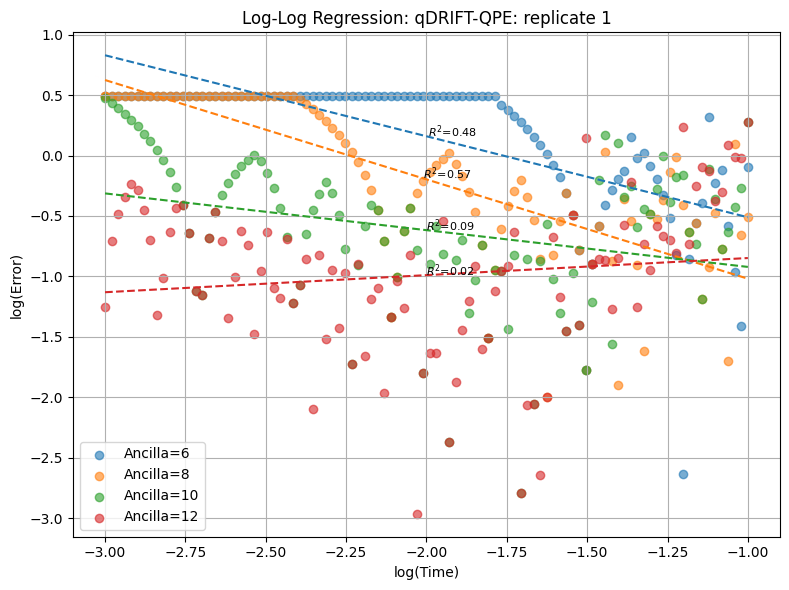

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



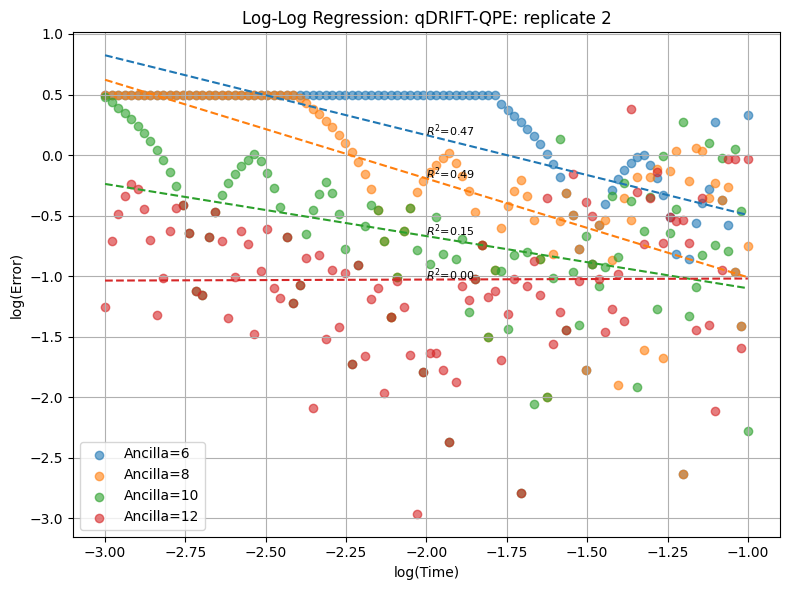

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



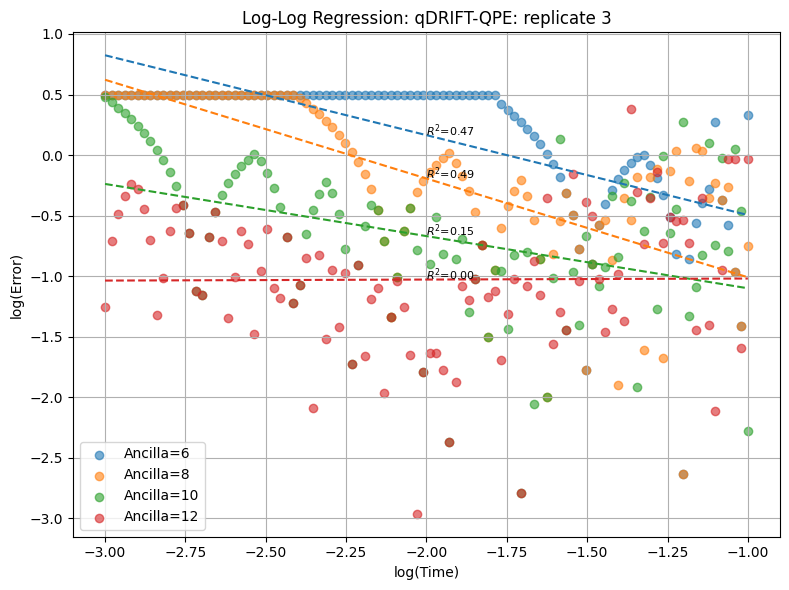

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



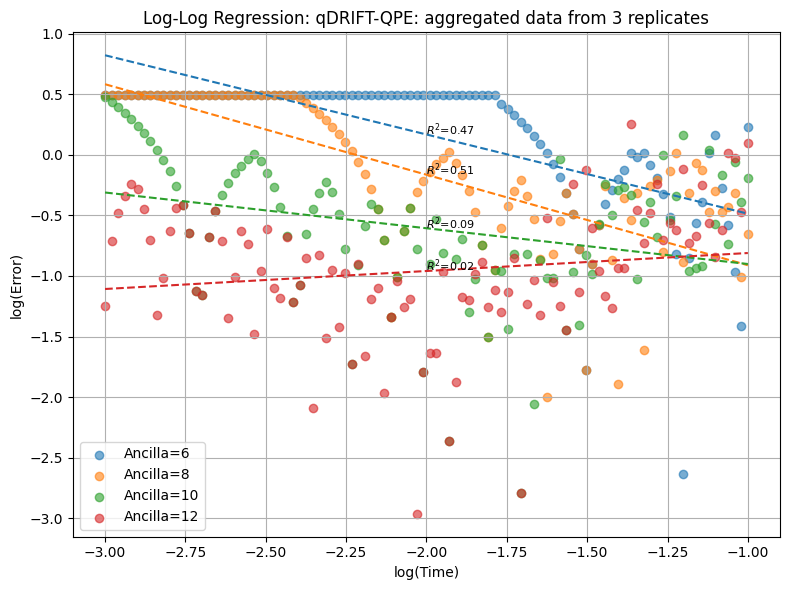

{6: 0.4698285984531554,
 8: 0.5074957898858447,
 10: 0.08848771544387013,
 12: 0.024374632294889342}

In [13]:
loglog_error_vs_time_with_regression(df=replicate_1_df, title_suffix="qDRIFT-QPE: replicate 1", true_eigenval=expected_eigenvalue)
loglog_error_vs_time_with_regression(df=replicate_2_df, title_suffix="qDRIFT-QPE: replicate 2", true_eigenval=expected_eigenvalue)
loglog_error_vs_time_with_regression(df=replicate_3_df, title_suffix="qDRIFT-QPE: replicate 3", true_eigenval=expected_eigenvalue)

# now the aggregated data
loglog_error_vs_time_with_regression(df=aggregated_df, title_suffix="qDRIFT-QPE: aggregated data from 3 replicates", true_eigenval=expected_eigenvalue, agg=True)

# Optimizing for the best time range

In [21]:
best_df, best_range, best_r2_12_qubits = search_best_time_interval_r2(
    aggregated_df,
    min_duration=0.05,
    title_suffix="qDRIFT-QPE: Best Time Interval Search",
    log_transform_data=True,
    show_plot=False,
    agg=True)




✅ Best R² sum = 0.5219 in interval (np.float64(0.0093260334688322), np.float64(0.1))


c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



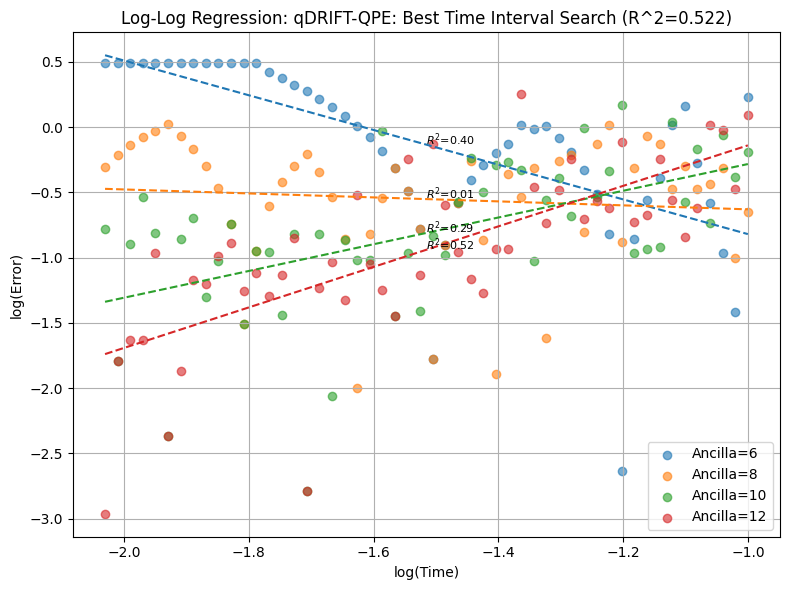

In [23]:
loglog_error_vs_time_with_regression(
    df=best_df,
    title_suffix=f"qDRIFT-QPE: Best Time Interval Search (R^2={best_r2_12_qubits:.3f})",
    true_eigenval=expected_eigenvalue,
    agg=True
)
plot_aggregated_error_vs_time(
    df=best_df,
    title_suffix=f"qDRIFT-QPE: Best Time Interval Search (R^2={best_r2_12_qubits:.3f})"
)


In [15]:
hoepfully_makking_qpe_error_negligible_df = qdrift_qpe_df_other_parameters[(qdrift_qpe_df_other_parameters["Num Shots per Circuit"] >= 1000) & 
                                                                           (qdrift_qpe_df_other_parameters["Num Ancilla"] ==6) & 
                                                                           (qdrift_qpe_df_other_parameters["Time"] >= 0.045)]
loglog_error_vs_time(hoepfully_makking_qpe_error_negligible_df, "qDRIFT-QPE: hopefully making QPE error negligible", expected_eigenvalue)

Slope: [-1.12563007  0.        ], Intercept: -1.8443440753271008, R^2: 0.03262219120030696


C:\Users\Ro\AppData\Local\Temp\ipykernel_5696\3016995622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ro\AppData\Local\Temp\ipykernel_5696\3016995622.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



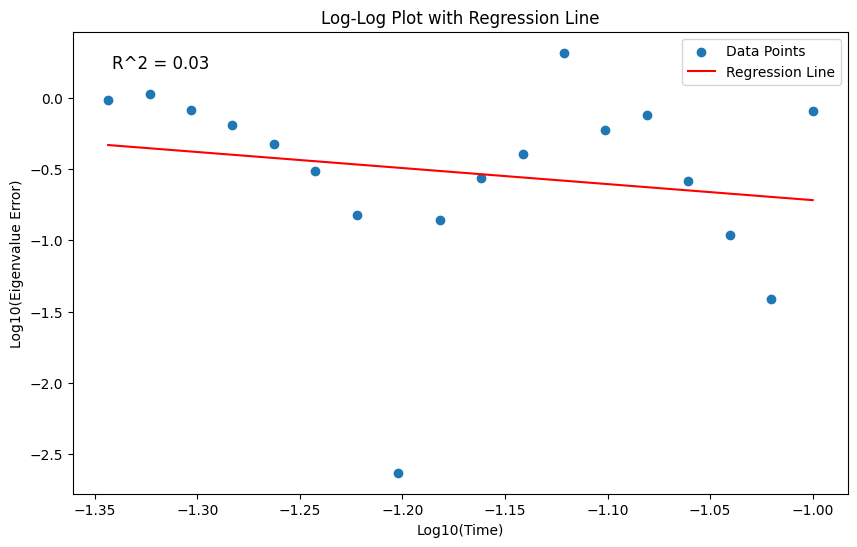

In [16]:
hoepfully_makking_qpe_error_negligible_df["log_time"] = np.log10(hoepfully_makking_qpe_error_negligible_df["Time"])
hoepfully_makking_qpe_error_negligible_df["log_error"] = np.log10(hoepfully_makking_qpe_error_negligible_df["Eigenvalue Error"])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
X = hoepfully_makking_qpe_error_negligible_df[["log_time", "Num Ancilla"]]
y = hoepfully_makking_qpe_error_negligible_df["log_error"]
model.fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
print(f"Slope: {model.coef_}, Intercept: {model.intercept_}, R^2: {r2}")
# Plot the regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(hoepfully_makking_qpe_error_negligible_df["log_time"], hoepfully_makking_qpe_error_negligible_df["log_error"], label="Data Points")
plt.plot(hoepfully_makking_qpe_error_negligible_df["log_time"], predictions, color='red', label="Regression Line")
#include r2 in the legend
plt.text(0.05, 0.95, f"R^2 = {r2:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel("Log10(Time)")
plt.ylabel("Log10(Eigenvalue Error)")
plt.title("Log-Log Plot with Regression Line")
plt.legend()
plt.show()



In [17]:

    
loglog_error_vs_time_with_regression(qdrift_qpe_df_other_parameters, "qDRIFT-QPE: all parameters", expected_eigenvalue, log_transform_data=True, show_plot=False)

{6: 0.5015276501433898,
 8: 0.6386352600028318,
 10: 0.08549591769860321,
 12: 0.01706915708101575}

In [18]:


# Search for the best time interval with R² sum
best_df, best_range, best_r2_sum = search_best_time_interval_r2(
    qdrift_qpe_df_other_parameters,
    min_duration=0.05,
    title_suffix="qDRIFT-QPE: Best Time Interval Search",
    log_transform_data=True,
    show_plot=False
)


✅ Best R² sum = 0.6749 in interval (np.float64(0.0453487850812858), np.float64(0.1))
